### Assignment 1, Problem 2

In [3]:
# Load packages
using Images  # Basic image processing functions
using PyPlot  # Plotting and image loading
using FileIO  # Functions for loading and storing data in the ".jld2" format

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1189
┌ Warning: Module PyCall with build ID 332682625034703 is missing from the cache.
│ This may mean PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:944


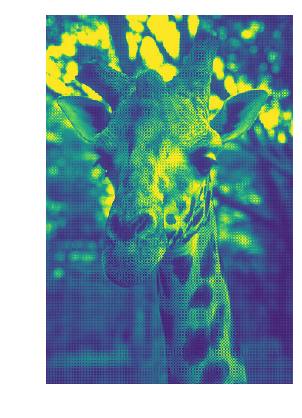

┌ Info: Recompiling stale cache file /Users/vipresenter/.julia/compiled/v1.0/JLD2/O1EyT.ji for JLD2 [033835bb-8acc-5ee8-8aae-3f567f8a3819]
└ @ Base loading.jl:1187


(PyObject <matplotlib.image.AxesImage object at 0x14190f128>, (-0.5, 319.5, 479.5, -0.5))

In [4]:
# Load the image from the provided .jld2 file
function loaddata()
  data = load("imagedata.jld2", "data")
  return data::Array{Float64,2}
end
image_data = loaddata()
imshow(image_data), axis("off")

In [5]:
# Separate the image data into three images (one for each color channel),
# filling up all unknown values with 0
function separatechannels(data::Array{Float64,2})
  r, g, b  = zeros(size(data)), zeros(size(data)), zeros(size(data))
  # red channels = odd rows + odd columns
  r[1:2:end,1:2:end] = data[1:2:end,1:2:end]
  # ... and even rows + even columns
  r[2:2:end,2:2:end] = data[2:2:end,2:2:end]
  # greeen channel = odd rows + even columns
  g[1:2:end,2:2:end] = data[1:2:end,2:2:end]
  # blue channels = even rows + odd columns
  b[2:2:end,1:2:end] = data[2:2:end,1:2:end]
  return r::Array{Float64,2},g::Array{Float64,2},b::Array{Float64,2}
end
r,g,b = separatechannels(image_data)

([0.298039 0.0 … 0.231373 0.0; 0.0 0.305882 … 0.0 0.227451; … ; 0.188235 0.0 … 0.235294 0.0; 0.0 0.192157 … 0.0 0.243137], [0.0 0.309804 … 0.0 0.243137; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.243137 … 0.0 0.309804; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.254902 0.0 … 0.176471 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.14902 0.0 … 0.160784 0.0])

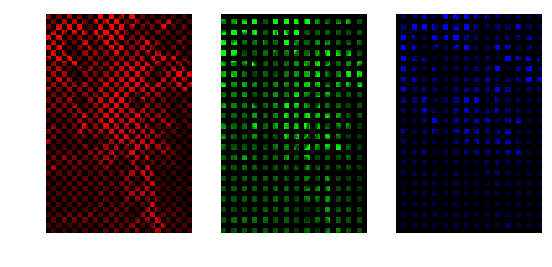

(PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x142819c50>, PyObject <matplotlib.image.AxesImage object at 0x14284f160>, (-0.5, 319.5, 479.5, -0.5))

In [6]:
# show channels before debayer
figure()
o = zeros(size(r))
R = cat(dims=3, r, o, o)
G = cat(dims=3, o, g, o)
B = cat(dims=3, o, o, b)
subplot(1,3,1), imshow(R, interpolation="none"), axis("off")
subplot(1,3,2), imshow(G, interpolation="none"), axis("off")
subplot(1,3,3), imshow(B, interpolation="none"), axis("off")

In [7]:
# Combine three color channels into a single image
function makeimage(r::Array{Float64,2},g::Array{Float64,2},b::Array{Float64,2})
  image = cat(dims=3,r,g,b)
  return image::Array{Float64,3}
end
img1 = makeimage(r,g,b)

480×320×3 Array{Float64,3}:
[:, :, 1] =
 0.298039  0.0       0.380392  0.0       …  0.0       0.231373  0.0     
 0.0       0.305882  0.0       0.45098      0.243137  0.0       0.227451
 0.294118  0.0       0.364706  0.0          0.0       0.235294  0.0     
 0.0       0.294118  0.0       0.454902     0.239216  0.0       0.235294
 0.333333  0.0       0.317647  0.0          0.0       0.239216  0.0     
 0.0       0.278431  0.0       0.501961  …  0.243137  0.0       0.235294
 0.513726  0.0       0.533333  0.0          0.0       0.231373  0.0     
 0.0       0.615686  0.0       0.733333     0.227451  0.0       0.247059
 0.670588  0.0       0.611765  0.0          0.0       0.227451  0.0     
 0.0       0.576471  0.0       0.67451      0.227451  0.0       0.243137
 0.627451  0.0       0.615686  0.0       …  0.0       0.231373  0.0     
 0.0       0.635294  0.0       0.619608     0.231373  0.0       0.254902
 0.619608  0.0       0.635294  0.0          0.0       0.247059  0.0     
 ⋮         

In [8]:
# Interpolate missing color values using bilinear interpolation
function interpolate(r::Array{Float64,2},g::Array{Float64,2},b::Array{Float64,2})
  # Interpolation filter for red values
  rfilter = [  0  1/4    0;
             1/4    1  1/4;
               0  1/4    0]

  # Interpolation filter for green and blue values
  gbfilter = [1/4  1/2  1/4;
              1/2    1  1/2;
              1/4  1/2  1/4]
  # Reflect causes boundary to be mirrored (compare vs "symmetric")
  r = imfilter(r, centered(rfilter), "reflect")
  g = imfilter(g, centered(gbfilter),  "reflect")
  b = imfilter(b, centered(gbfilter), "reflect")

  # again, concatenate channels
  image = cat(dims=3,r,g,b)
  return image::Array{Float64,3}
end
img2 = interpolate(r,g,b)

480×320×3 Array{Float64,3}:
[:, :, 1] =
 0.298039  0.322549  0.380392  0.419608  …  0.238235  0.231373  0.229412
 0.30098   0.305882  0.37549   0.45098      0.243137  0.234314  0.227451
 0.294118  0.314706  0.364706  0.443137     0.240196  0.235294  0.233333
 0.303922  0.294118  0.357843  0.454902     0.239216  0.237255  0.235294
 0.333333  0.305882  0.317647  0.45         0.242157  0.239216  0.237255
 0.35098   0.278431  0.407843  0.501961  …  0.243137  0.237255  0.235294
 0.513726  0.485294  0.533333  0.610784     0.236275  0.231373  0.236275
 0.603922  0.615686  0.623529  0.733333     0.227451  0.233333  0.247059
 0.670588  0.618627  0.611765  0.681373     0.226471  0.227451  0.236275
 0.612745  0.576471  0.619608  0.67451      0.227451  0.232353  0.243137
 0.627451  0.613726  0.615686  0.64902   …  0.228431  0.231373  0.240196
 0.629412  0.635294  0.626471  0.619608     0.231373  0.241176  0.254902
 0.619608  0.635294  0.635294  0.613726     0.245098  0.247059  0.25098 
 ⋮         

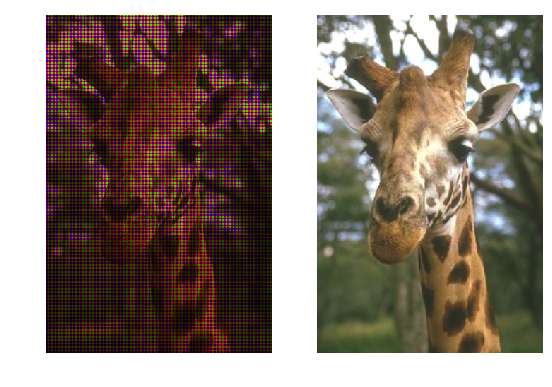

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x142b1e0b8>, PyObject <matplotlib.image.AxesImage object at 0x1426ec588>, (-0.5, 319.5, 479.5, -0.5))

In [9]:
# Display two images in a single figure window
function displayimages(img1::Array{Float64,3}, img2::Array{Float64,3})
  figure()
  subplot(1,2,1), imshow(img1, interpolation="none"), axis("off")
  subplot(1,2,2), imshow(img2, interpolation="none"), axis("off")
end
displayimages(img1, img2)